In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the data
df=pd.read_csv('/content/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [ ]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [ ]:
#Checking for Null values.
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [ ]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

The data is balanced.

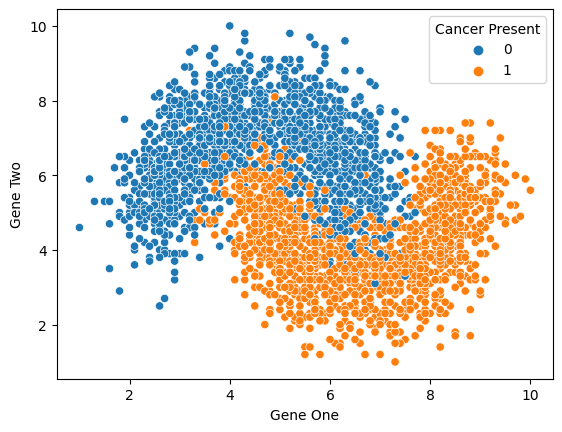

In [ ]:
# Distribution of Independent variable.
sns.scatterplot(x=df['Gene One'], y=df['Gene Two'], hue=df['Cancer Present'])
plt.show()

In [ ]:
X=df.drop('Cancer Present', axis=1)
y=df['Cancer Present']

In [ ]:
#Splitting the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 2)
(600, 2)
(2400,)
(600,)


In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

In [ ]:
X_test=sc.transform(X_test)

In [ ]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
#Predicting
y_test_pred= model.predict(X_test)
y_train_pred=model.predict(X_train)

In [ ]:
#Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))
print('CV:', cross_val_score(model, X, y, cv=5).mean())

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Train accuracy: 0.945
Test accuracy: 0.9316666666666666
CV: 0.9276666666666668
[[267  16]
 [ 25 292]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       283
           1       0.95      0.92      0.93       317

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={'n_neighbors': list(range(1,21)), 'p':[1,2]}
hp_model=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
hp_model.fit(X_train, y_train)
hp_model.best_params_

{'n_neighbors': 10, 'p': 1}

In [ ]:
# Building the final model with best parameters.
fianl_model= KNeighborsClassifier(n_neighbors=10, p=1)
fianl_model.fit(X_train, y_train)

y_test_pred= fianl_model.predict(X_test)
y_train_pred=fianl_model.predict(X_train)

print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))
print('CV:', cross_val_score(fianl_model, X, y, cv=5).mean())

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Train accuracy: 0.9420833333333334
Test accuracy: 0.925
CV: 0.9286666666666668
[[267  16]
 [ 29 288]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       283
           1       0.95      0.91      0.93       317

    accuracy                           0.93       600
   macro avg       0.92      0.93      0.92       600
weighted avg       0.93      0.93      0.93       600

